In [9]:
import os

def list_sim_paths(root: str):
    """
    List all simulation paths in the given root directory.
    """
    sim_paths = []

    def recursive_add_simpaths(root: str):
        paths = []
        if "metric.csv" in os.listdir(root) and "pos.csv" in os.listdir(root):
            return [root]
        for path in os.listdir(root):
            subpath = os.path.join(root, path)
            if os.path.isdir(subpath):
                paths += recursive_add_simpaths(subpath)
        return paths

    return recursive_add_simpaths(root)

In [20]:
reference_csv = "/Users/ashkanhzdr/workspace/infectio-mesa/examples/vacv-epithelial/reference_metrics_for_M061_dVGFdF11_handpicked.csv"
sim_root = "/Users/ashkanhzdr/workspace/infectio-mesa/output/add_sigmoid/dVGFdF11/local_runs"

sim_paths = list_sim_paths(sim_root)
len(sim_paths), sim_paths

(20,
 ['/Users/ashkanhzdr/workspace/infectio-mesa/output/add_sigmoid/dVGFdF11/local_runs/randomwalk_speed=0.5-c2c_k=1-c2c_x0=48-c2c_radius=30/2024-11-04_16:41:33',
  '/Users/ashkanhzdr/workspace/infectio-mesa/output/add_sigmoid/dVGFdF11/local_runs/randomwalk_speed=0.5-c2c_k=1-c2c_x0=48-c2c_radius=30/2024-11-04_16:49:07',
  '/Users/ashkanhzdr/workspace/infectio-mesa/output/add_sigmoid/dVGFdF11/local_runs/randomwalk_speed=0.5-c2c_k=1-c2c_x0=48-c2c_radius=30/2024-11-04_16:51:34',
  '/Users/ashkanhzdr/workspace/infectio-mesa/output/add_sigmoid/dVGFdF11/local_runs/randomwalk_speed=0.5-c2c_k=1-c2c_x0=48-c2c_radius=30/2024-11-04_16:56:12',
  '/Users/ashkanhzdr/workspace/infectio-mesa/output/add_sigmoid/dVGFdF11/local_runs/randomwalk_speed=0.5-c2c_k=1-c2c_x0=48-c2c_radius=30/2024-11-04_16:22:24',
  '/Users/ashkanhzdr/workspace/infectio-mesa/output/add_sigmoid/dVGFdF11/local_runs/randomwalk_speed=0.5-c2c_k=1-c2c_x0=48-c2c_radius=30/2024-11-04_16:19:07',
  '/Users/ashkanhzdr/workspace/infectio-m

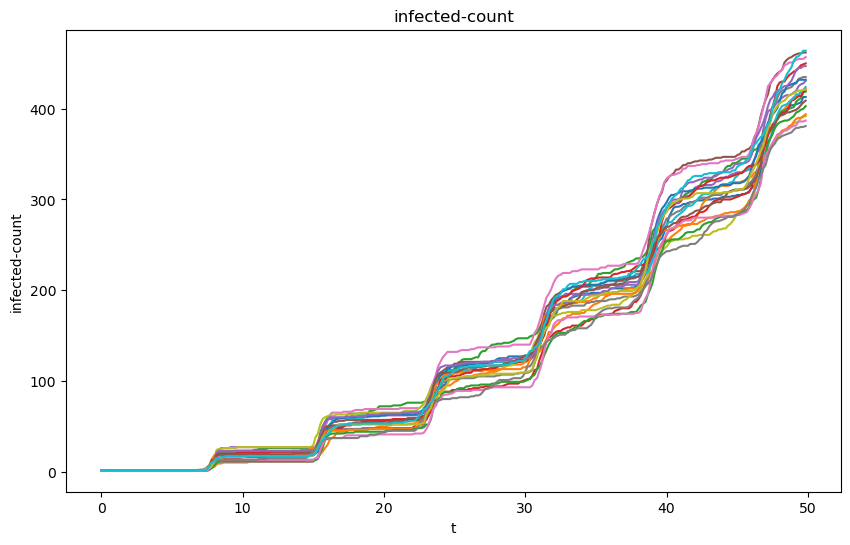

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_column_across_paths(column_name, paths):
    """
    Plots the specified column against 't' for each path in the given list.
    
    Parameters:
    column_name (str): The name of the column to plot.
    paths (list): List of file paths containing metric.csv files.
    """
    plt.figure(figsize=(10, 6))
    
    for path in paths:
        # Construct the file path to metric.csv
        file_path = os.path.join(path, 'metric.csv')
        
        # Read the CSV file
        try:
            data = pd.read_csv(file_path)
            
            # Ensure 't' and specified column exist
            if 't' not in data.columns or column_name not in data.columns:
                print(f"Warning: 't' or '{column_name}' not found in {file_path}. Skipping this file.")
                continue
            
            # Plot the specified column vs 't'
            plt.plot(data['t'], data[column_name], label=os.path.basename(path))
        
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
            continue

    # Add labels and title
    plt.xlabel('t')
    plt.ylabel(column_name)
    plt.title(f"{column_name}")
    # plt.legend()
    plt.show()

plot_column_across_paths("infected-count", sim_paths)

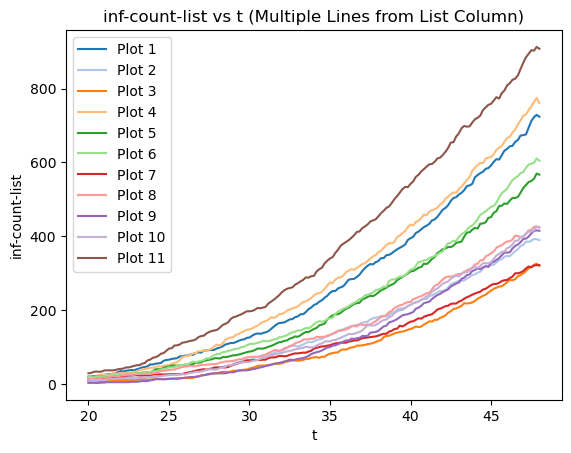

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import ast  # To safely evaluate list strings to Python lists

cmap = plt.cm.tab20

def plot_lists_from_column(csv_file, column_name):
    """
    Plots each element in the list (from the specified column) against 't' from a single CSV file.
    
    Parameters:
    csv_file (str): Path to the CSV file.
    column_name (str): The name of the column containing lists to plot.
    """
    # Load the data
    data = pd.read_csv(csv_file)
    
    # Ensure 't' and the specified column exist
    if 't' not in data.columns or column_name not in data.columns:
        print(f"Error: 't' or '{column_name}' not found in {csv_file}.")
        return
    
    # Extract 't' values
    t_values = data['t']
    
    # Initialize a list to store each separate series for plotting
    series = []
    
    # Convert each row in the specified column to a list and store in series
    for item in data[column_name]:
        try:
            # Safely convert the string representation of the list to an actual list
            values = ast.literal_eval(item)
            series.append(values)
        except Exception as e:
            print(f"Error processing row: {e}")
            return
    
    # Transpose the series to get lists of each individual plot series
    # Assuming all rows contain lists of the same length
    num_plots = len(series[0])
    for i in range(num_plots):
        # Plot the i-th series from each row
        plt.plot(t_values, [row[i] for row in series], label=f"Plot {i + 1}", color=cmap(i % len(cmap.colors)))
    
    # Add labels and title
    plt.xlabel('t')
    plt.ylabel(column_name)
    plt.title(f"{column_name} vs t (Multiple Lines from List Column)")
    plt.legend()
    plt.show()

plot_lists_from_column("/Users/ashkanhzdr/workspace/infectio-mesa/examples/vacv-epithelial/reference_metrics_for_M061_dVGFdF11_handpicked.csv", "inf-count-list")

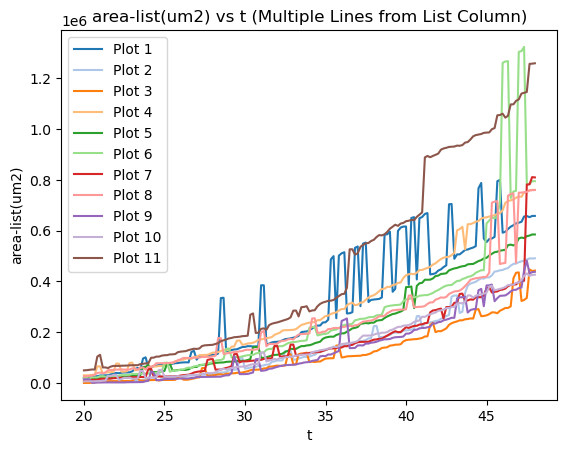

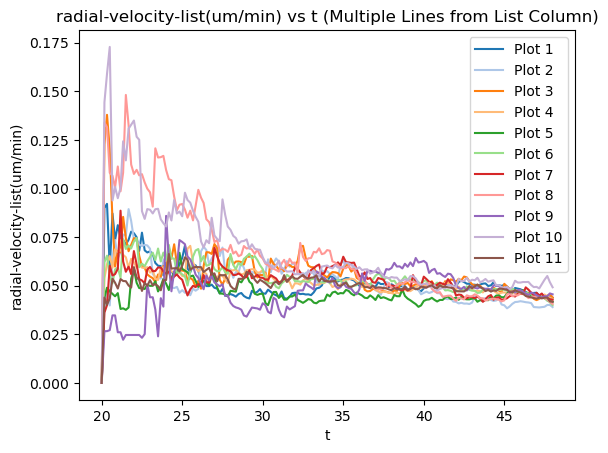

In [32]:
plot_lists_from_column(reference_csv, "area-list(um2)")
plot_lists_from_column(reference_csv, "radial-velocity-list(um/min)")

# all plot

In [33]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import ast  # To safely evaluate list strings to Python lists

def plot_combined(column_name_paths, column_name_single, paths, single_csv_file):
    """
    Plots data from multiple metric.csv files and a single CSV with lists in a column,
    distinguishing between them with different line styles.
    
    Parameters:
    column_name_paths (str): The column name to plot from the multiple metric.csv files.
    column_name_single (str): The column name in the single CSV file containing lists.
    paths (list): List of file paths containing metric.csv files (solid lines).
    single_csv_file (str): Path to a CSV file where specified column contains lists (dashed lines).
    """
    plt.figure(figsize=(12, 8))
    
    # Plot from multiple metric.csv files (solid lines)
    for path in paths:
        file_path = os.path.join(path, 'metric.csv')
        
        try:
            data = pd.read_csv(file_path)
            
            if 't' not in data.columns or column_name_paths not in data.columns:
                print(f"Warning: 't' or '{column_name_paths}' not found in {file_path}. Skipping this file.")
                continue
            
            # Plot using solid lines
            plt.plot(data['t'], data[column_name_paths], label=os.path.basename(path), linestyle='-')
        
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
            continue

    # Plot from the single CSV file with lists in a column (dashed lines)
    try:
        data = pd.read_csv(single_csv_file)
        
        if 't' not in data.columns or column_name_single not in data.columns:
            print(f"Error: 't' or '{column_name_single}' not found in {single_csv_file}.")
            return
        
        t_values = data['t']
        
        # Extract lists from the specified column and plot each sub-list as a separate dashed line
        series = []
        for item in data[column_name_single]:
            values = ast.literal_eval(item)
            series.append(values)
        
        # Transpose to get each series for plotting
        num_plots = len(series[0])
        for i in range(num_plots):
            plt.plot(t_values, [row[i] for row in series], linestyle='--', label=f"{os.path.basename(single_csv_file)} Plot {i + 1}")
    
    except Exception as e:
        print(f"Error reading {single_csv_file}: {e}")
    
    # Add labels, title, and legend
    plt.xlabel('t')
    plt.ylabel(column_name_paths)  # Using column_name_paths for labeling, as they represent the same data
    plt.title(f"{column_name_paths} vs t (Solid: Simulation, Dashed: Experiment)")
    # plt.legend()
    plt.show()

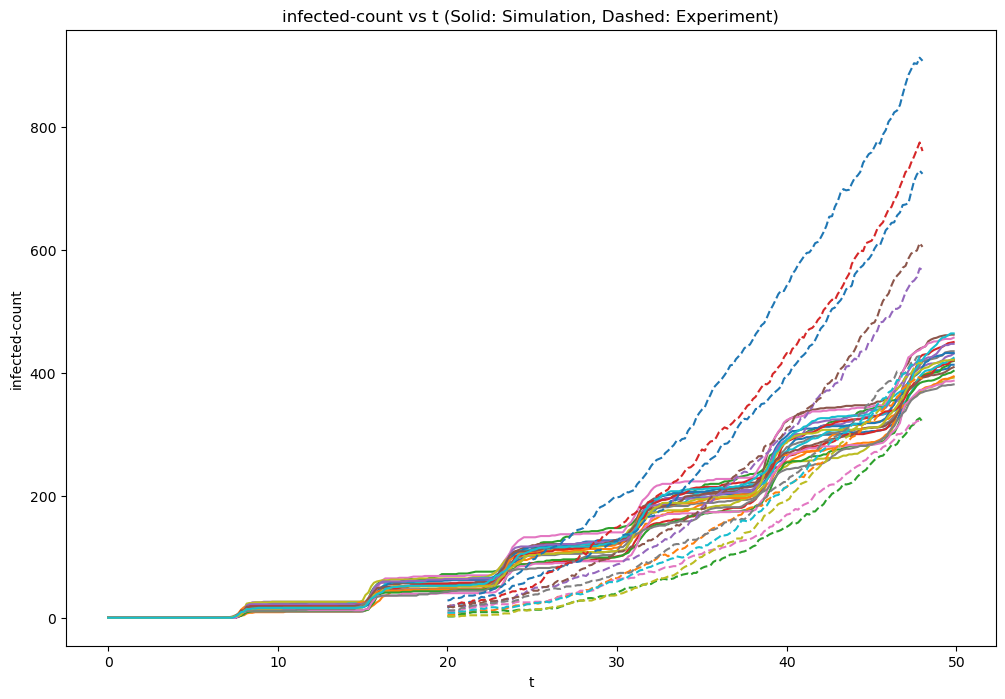

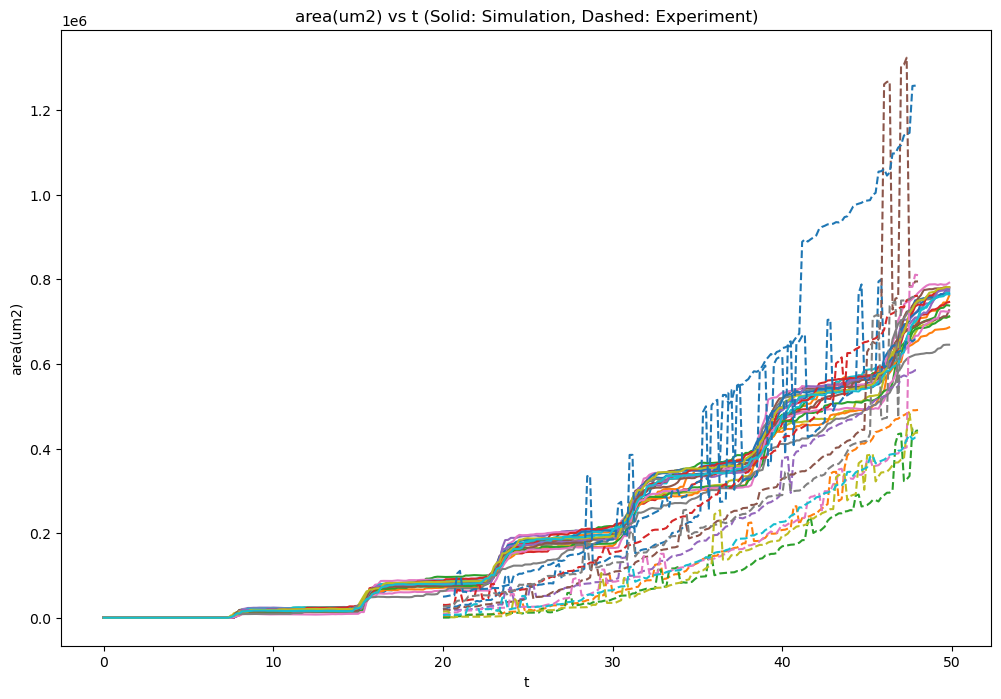

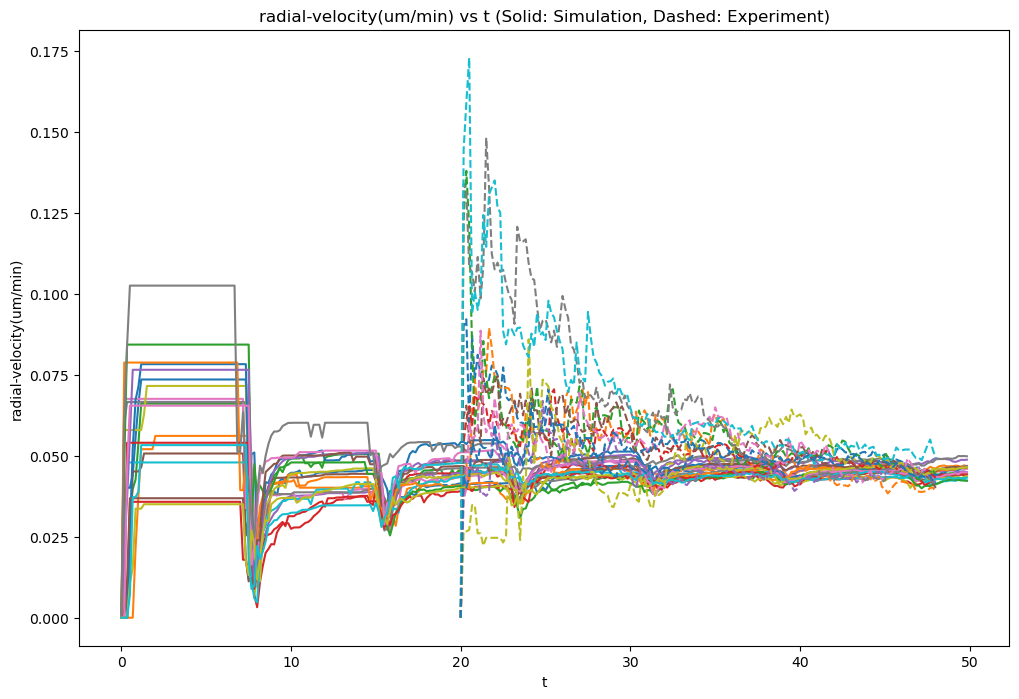

In [34]:
plot_combined("infected-count", "inf-count-list", sim_paths, reference_csv)
plot_combined("area(um2)", "area-list(um2)", sim_paths, reference_csv)
plot_combined("radial-velocity(um/min)", "radial-velocity-list(um/min)", sim_paths, reference_csv)